## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2         # using opencv to read images
import os
import tifffile    # stacked images format .tiff
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.models import Model
from tensorflow.keras.layers import Flatten
from keras.models import load_model
from tensorflow import keras

In [ ]:
directory = "./drive/MyDrive/Anndata/"

In [ ]:
path = os.listdir(directory)

# Data Preprocessing

## Images Directory

In [ ]:
img_directory = {}
folder = []
    #using os.walk
for root, dirs, folder in os.walk(directory):         
    dir_name = os.path.basename(root)
    img_directory[dir_name] = [root + '/' + file for file in folder]

key = list(img_directory.keys())[0]
img_directory.pop(key)

for key, value in img_directory.items():
    img_directory[key] = [v for v in value if "png" in v] 

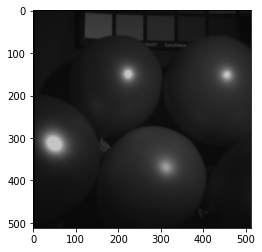

In [ ]:
img = cv2.imread('./drive/MyDrive/Anndata/balloons_ms/balloons_ms/balloons_ms_01.png')
img.shape
plt.imshow(img)

## Stacking Images

In [ ]:
msi = {}
#img_name = key() and direct = value()
for img_name, direct in img_directory.items():
    print(img_name)
    images = [cv2.imread(img, 0) for img in direct]
    images = np.asarray(images)
    stacked_image = np.stack(images, axis=2)
    msi[img_name] = stacked_image
#print("multi_spectral_images = ",msi)

watercolors_ms
real_and_fake_apples_ms
superballs_ms
real_and_fake_peppers_ms
sponges_ms
photo_and_face_ms
paints_ms
stuffed_toys_ms
pompoms_ms
thread_spools_ms
flowers_ms
oil_painting_ms
fake_and_real_sushi_ms
glass_tiles_ms
fake_and_real_strawberries_ms
jelly_beans_ms
hairs_ms
feathers_ms
fake_and_real_peppers_ms
fake_and_real_tomatoes_ms
cloth_ms
fake_and_real_lemon_slices_ms
egyptian_statue_ms
fake_and_real_food_ms
fake_and_real_beers_ms
face_ms
chart_and_stuffed_toy_ms
fake_and_real_lemons_ms
clay_ms
cd_ms
balloons_ms
beads_ms


### Shape of Stacked Image

In [ ]:
one_stacked_img = msi['balloons_ms'].shape
print("stacked_image_shape =",one_stacked_img)

stacked_image_shape = (512, 512, 31)


# Patches

In [ ]:
def patch_all(multi_spec,filterdim1,filterdim2,stride):

  g_patches = []

  for key, value in multi_spec.items():
      #print(key)
      img_shape = multi_spec[key].shape
      width, height = img_shape[1], img_shape[0]
      
      for row in range(height // filterdim1):
          for col in range(width // filterdim2):
              img_patch = value[row*64:(row+1)*64, col*64:(col+1)*64, 0:stride]
              g_patches.append(img_patch)
  return g_patches

In [ ]:
patches = patch_all(msi,64,64,31)
print("length of patches =",len(patches))

length of patches = 2048


## Labelling data

In [ ]:
y = np.asarray(patches)
y = y.astype(float)
print("Label y =",y.shape)

Label y = (2048, 64, 64, 31)


## Feature x_a = (8, 8, 31)

In [ ]:
x_a = tf.keras.layers.AveragePooling2D(pool_size=(8, 8),strides=(8, 8), padding='valid',dtype='float64')
x_a = x_a(y)
print("x_a =",x_a.shape)

x_a = (2048, 8, 8, 31)


## Feature x_b = (64, 64, 3)

In [ ]:
xb1 = y[:,:,:,0:11].mean(axis = 3)
xb2 = y[:,:,:,10:21].mean(axis = 3)
xb3 = y[:,:,:,20:].mean(axis = 3)
print("Shape of xb1 =",xb1.shape,"\nShape of xb2 =", xb2.shape,"\nShape of xb3 =", xb3.shape)

x_b = np.stack([xb1, xb2, xb3], axis=3)                  
print('\nx_b =', x_b.shape)

Shape of xb1 = (2048, 64, 64) 
Shape of xb2 = (2048, 64, 64) 
Shape of xb3 = (2048, 64, 64)

x_b = (2048, 64, 64, 3)


In [ ]:
print("Labels y = ", y.shape)
print("\nFeature x_a = ",x_a.shape)
print("Feature x_b = ",x_b.shape)

Labels y =  (2048, 64, 64, 31)

Feature x_a =  (2048, 8, 8, 31)
Feature x_b =  (2048, 64, 64, 3)


## Reshaping Data

In [ ]:
X_interpolate = tf.image.resize(x_a, (64, 64), method='bilinear')
X_interpolate.shape
print(X_interpolate.shape)

x = tf.concat([X_interpolate, x_b], axis=-1)
print("X = ",x.shape)

(2048, 64, 64, 31)
X =  (2048, 64, 64, 34)


## Data Normalization

In [ ]:
X = x/255                #we normalize data to bring value in range of 0 and 1
y = y/255

In [ ]:
X = np.array(x)
y = np.array(y)

In [ ]:
print("X =",X.shape)
print("y =",y.shape)

X = (2048, 64, 64, 34)
y = (2048, 64, 64, 31)


### using Padding to equalize both X and y sets

In [ ]:
y = np.pad(y, [(0,0), (0,0), (0,0), (0,3)], mode='constant')
y = np.array(y)

print("y = ", y.shape)
print("X = ", X.shape)

y =  (2048, 64, 64, 34)
X =  (2048, 64, 64, 34)


## Train, Test, Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print("X_train =",X_train.shape)
print("X_test =",X_test.shape)
print("y_train =",y_train.shape)
print("y_test =",y_test.shape)

X_train = (1638, 64, 64, 34)
X_test = (410, 64, 64, 34)
y_train = (1638, 64, 64, 34)
y_test = (410, 64, 64, 34)


### y_train = (1638, 64x64x34)

In [ ]:
f = Flatten()
y_train = f(y_train)
y_test = f(y_test)
print("y_train =",y_train.shape)
print("y_test =",y_test.shape)

y_train = (1638, 139264)
y_test = (410, 139264)


## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

model = Sequential()

# 1st Convolution Layer:
# (2048, 64, 64, 34) 
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:])) # only for first layer we metion input layer size.
model.add(Activation('LeakyReLU')) # for including non-linearity.
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling

# 2nd Convolution Layer:
model.add(Conv2D(64, (3,3)))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Convolution Layer:
model.add(Conv2D(64, (3,3)))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 1st Fully Connected Dense Layer:
model.add(Flatten()) # Before connection fully connected layers we need to flatten. 2D to 1D 
model.add(Dense(1000))
model.add(Activation('LeakyReLU'))

# 2nd Fully Connected Dense Layer:
model.add(Dense(500))
model.add(Activation('LeakyReLU'))

# 3rd Fully Connected Dense Layer:
model.add(Dense(500))
model.add(Activation('LeakyReLU'))

# 4th Fully Connected Dense Layer:
model.add(Dense(250))
model.add(Activation('LeakyReLU'))

# 5th Fully Connected Dense Layer:
model.add(Dense(250))
model.add(Activation('LeakyReLU'))

# 6th Fully Connected Dense Layer:
model.add(Dense(139264)) # This is the last layer, output must be equal to the number of classes which is 32 
model.add(Activation('linear'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        19648     
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss = 'mean_absolute_error',optimizer = 'adam')
model.optimizer.lr = 0.001

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
52/52 [==============================] - 55s 1s/step - loss: 0.0836 - val_loss: 0.0586
Epoch 2/50
52/52 [==============================] - 51s 977ms/step - loss: 0.0515 - val_loss: 0.0509
Epoch 3/50
52/52 [==============================] - 51s 983ms/step - loss: 0.0468 - val_loss: 0.0473
Epoch 4/50
52/52 [==============================] - 53s 1s/step - loss: 0.0450 - val_loss: 0.0485
Epoch 5/50
52/52 [==============================] - 51s 979ms/step - loss: 0.0435 - val_loss: 0.0437
Epoch 6/50
52/52 [==============================] - 51s 978ms/step - loss: 0.0417 - val_loss: 0.0436
Epoch 7/50
52/52 [==============================] - 54s 1s/step - loss: 0.0411 - val_loss: 0.0411
Epoch 8/50
52/52 [==============================] - 50s 970ms/step - loss: 0.0388 - val_loss: 0.0409
Epoch 9/50
52/52 [==============================] - 51s 973ms/step - loss: 0.0403 - val_loss: 0.0456
Epoch 10/50
52/52 [==============================] - 53s 1s/step - loss: 0.0383 - val_loss: 0.0402
E

## Plotting Loss

In [ ]:
#history.history.keys()

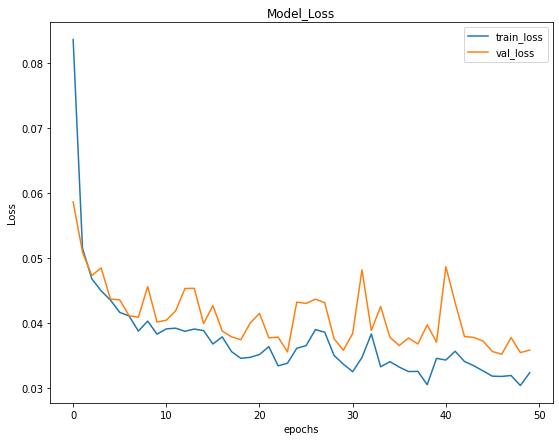

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc='upper right')
plt.show()

## Model1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

model1 = Sequential()

# 1st Convolution Layer:
# (2048, 64, 64, 34) 
model1.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:])) # only for first layer we metion input layer size.
model1.add(Activation('LeakyReLU')) # for including non-linearity.
model1.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling
model1.add(Dropout(0.2))

# 2nd Convolution Layer:
model1.add(Conv2D(64, (3,3)))
model1.add(Activation('LeakyReLU'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

# 3rd Convolution Layer:
model1.add(Conv2D(64, (3,3)))
model1.add(Activation('LeakyReLU'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

# 1st Fully Connected Dense Layer:
model1.add(Flatten()) # Before connection fully connected layers we need to flatten. 2D to 1D 
model1.add(Dense(1000))
model1.add(Activation('ReLU'))
model1.add(Dropout(0.2))

# 2nd Fully Connected Dense Layer:
model1.add(Dense(500))
model1.add(Activation('LeakyReLU'))
model1.add(Dropout(0.2))

# 3rd Fully Connected Dense Layer:
model1.add(Dense(500))
model1.add(Activation('LeakyReLU'))
model1.add(Dropout(0.2))

# 6th Fully Connected Dense Layer:
model1.add(Dense(139264)) # This is the last layer, output must be equal to the number of classes which is 32 
model1.add(Activation('linear'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        19648     
                                                                 
 activation_16 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 29, 29, 64)        0         
                                                      

In [ ]:
model1.compile(loss = 'mean_squared_error',optimizer = 'adam')
model1.optimizer.lr = 0.001

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
52/52 [==============================] - 82s 2s/step - loss: 0.1313 - val_loss: 0.0233
Epoch 2/50
52/52 [==============================] - 71s 1s/step - loss: 0.0162 - val_loss: 0.0251
Epoch 3/50
52/52 [==============================] - 71s 1s/step - loss: 0.0134 - val_loss: 0.0187
Epoch 4/50
52/52 [==============================] - 72s 1s/step - loss: 0.0131 - val_loss: 0.0177
Epoch 5/50
52/52 [==============================] - 72s 1s/step - loss: 0.0127 - val_loss: 0.0180
Epoch 6/50
52/52 [==============================] - 72s 1s/step - loss: 0.0126 - val_loss: 0.0121
Epoch 7/50
52/52 [==============================] - 73s 1s/step - loss: 0.0115 - val_loss: 0.0158
Epoch 8/50
52/52 [==============================] - 72s 1s/step - loss: 0.0109 - val_loss: 0.0107
Epoch 9/50
52/52 [==============================] - 72s 1s/step - loss: 0.0106 - val_loss: 0.0101
Epoch 10/50
52/52 [==============================] - 73s 1s/step - loss: 0.0105 - val_loss: 0.0097
Epoch 11/50
52/52 [

In [ ]:
#history1.history.keys()

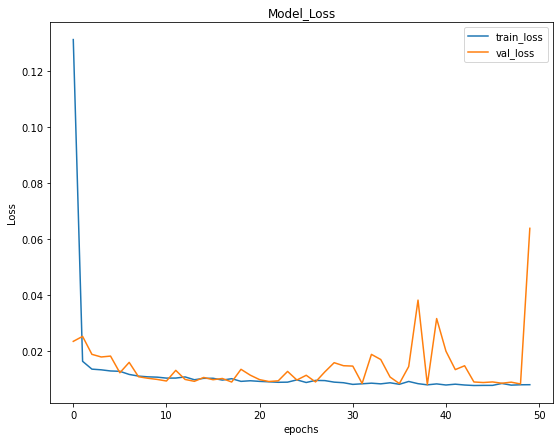

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc='upper right')
plt.show()

In [ ]:
model2 = Sequential()

# 1st Convolution Layer:
# (2048, 64, 64, 34) 
model2.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:])) # only for first layer we metion input layer size.
model2.add(Activation('LeakyReLU')) # for including non-linearity.
model2.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling
model2.add(Dropout(0.2))

# 2nd Convolution Layer:
model2.add(Conv2D(64, (3,3)))
model2.add(Activation('LeakyReLU'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# 3rd Convolution Layer:
model2.add(Conv2D(64, (3,3)))
model2.add(Activation('LeakyReLU'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# 1st Fully Connected Dense Layer:
model2.add(Flatten()) # Before connection fully connected layers we need to flatten. 2D to 1D 
model2.add(Dense(1000))
model2.add(Activation('ReLU'))
model2.add(Dropout(0.2))

# 2nd Fully Connected Dense Layer:
model2.add(Dense(500))
model2.add(Activation('LeakyReLU'))
model2.add(Dropout(0.2))

# 6th Fully Connected Dense Layer:
model2.add(Dense(139264)) # This is the last layer, output must be equal to the number of classes which is 32 
model2.add(Activation('linear'))

In [ ]:
model2.compile(loss = 'mean_squared_error',optimizer = 'SGD', metrics=['accuracy'])
model2.optimizer.lr = 0.001

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
52/52 [==============================] - 91s 2s/step - loss: 0.1002 - accuracy: 0.0000e+00 - val_loss: 0.0461 - val_accuracy: 0.0000e+00
Epoch 2/50
52/52 [==============================] - 92s 2s/step - loss: 0.0937 - accuracy: 0.0000e+00 - val_loss: 0.0453 - val_accuracy: 0.0000e+00
Epoch 3/50
52/52 [==============================] - 86s 2s/step - loss: 0.0891 - accuracy: 0.0000e+00 - val_loss: 0.0446 - val_accuracy: 0.0000e+00
Epoch 4/50
52/52 [==============================] - 90s 2s/step - loss: 0.0857 - accuracy: 0.0000e+00 - val_loss: 0.0442 - val_accuracy: 0.0000e+00
Epoch 5/50
52/52 [==============================] - 84s 2s/step - loss: 0.0827 - accuracy: 0.0000e+00 - val_loss: 0.0436 - val_accuracy: 0.0000e+00
Epoch 6/50
52/52 [==============================] - 85s 2s/step - loss: 0.0797 - accuracy: 0.0000e+00 - val_loss: 0.0432 - val_accuracy: 0.0000e+00
Epoch 7/50
52/52 [==============================] - 83s 2s/step - loss: 0.0782 - accuracy: 0.0000e+00 - val_loss

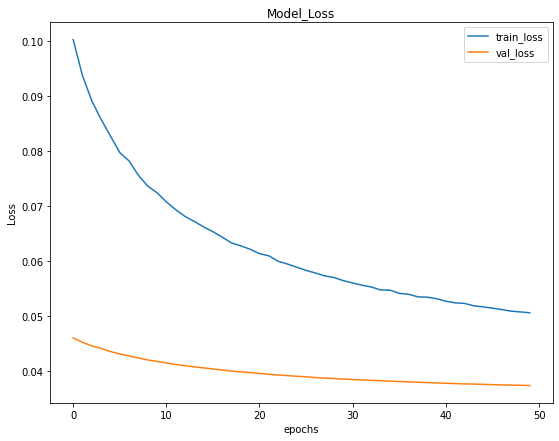

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train_loss','val_loss'], loc='upper right')
plt.show()